<a href="https://colab.research.google.com/github/danieloselu3/phase4-project/blob/main/Tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tweets Sentiment Analysis** 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> In a world where technology startups are common, consumer perception of a brand can provide us with valuable information about their purchasing behavior and, in turn, the financial performance of the business that produces them. . In order to determine which brands to research further for potential investment, Longview techventures wants a generalizable model to measure sentiment across various brands. Because people only purchase items they like, Longview techventures is only interested in whether consumers feel positively about the brand.

> **Problem Statement:** Longview techventures, a technology investment firm, has hired us to help them develop a predictive model that keeps track of recent tweets about tech products so they can make smart investment choices.

### b) Defining the Metric for Success

We don't want to overvalue or undervalue a company, however, in the current market condition where labor cost and shortage is prominent, spending human resources to evaluate a company and finding out it's not worth investing in is more costly. Therefore, we care about maximizing accuracy as well as precision.

### c) Understanding the context 

[Data.world](https://data.world/crowdflower/brands-and-product-emotions) through CrowdFlower, provided the dataset. Over 9,000 Tweets were rated as either positive, negative, or neither by human raters. The tweets are from the South by South West conference, and the majority of them are about Apple and Google products. The information was assembled in 2013.
Tweets are typically brief and emotional. They do a great job of capturing consumers' reactions to brands in real time. South by Southwest features the most recent technology and enables customers to contrast products from leading tech companies side by side, which can somewhat lessen their biases.
The tweets with positive sentiment and the tweets without positive sentiment, which include neutral, negative, and indistinguishable sentiments, are the two categories into which we engineered our target.Only the sentiment of the tweet matters to us because it can increase sales and therefore return on investment.



### d) Data Relevance

Longview Techventures will use the data to determine which products to invest in to increase their profits based on customer satisfaction.

## 2. Reading the Data

In [149]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
import re
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer, word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
#from wordcloud import WordCloud


from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_colwidth', 10000)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [150]:
# Loading the Data from the source i.e. csv
data = pd.read_csv('/judge_tweet_product_company.csv')



## 3. Checking the Data

In [151]:
# Determining the no. of records in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [152]:
# Previewing the top of our dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [153]:
# Previewing the bottom of our dataset
data.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product
8720,�ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mention Google Tests ���Check-in Offers�۝ At #SXSW {link},NaN,No emotion toward brand or product


In [154]:
#check the shape of the dataframe
data.shape

(8721, 3)

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

To make it easier to read and analyse the data, we rename the columns.

In [155]:
#rename columns for readability
data = data.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
data.head()

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


Before doing our analysis, we check for missing data or duplicated rows 

In [156]:
#looking at data, duplicates and null values
print(data.info())
print(("-"*20))

# Check for duplicated rows
print('Total duplicated rows')
print(data.duplicated().sum())
print(("-"*20))

# Check for null values
print('Total null values')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      8720 non-null   object
 1   Product    3169 non-null   object
 2   Sentiment  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
Tweet           1
Product      5552
Sentiment       0
dtype: int64


Checking the contents in the product and sentiment columns 

In [157]:
# Print the value count of product and sentiment column
print(data['Product'].value_counts())
print(("-"*20))
print(data['Sentiment'].value_counts())

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: Product, dtype: int64
--------------------
No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: Sentiment, dtype: int64


In [158]:
#Simplify sentiment labels for visualizations
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive emotion',
             'Negative emotion':'Negative emotion',
             "I can't tell": "I can't tell"}
data['Sentiment'] = data['Sentiment'].map(dict_sent)

**Handling duplicates**

In [159]:
#drop any NaN in the Tweet column
data['Tweet'].dropna(inplace=True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion


In [160]:
#More data cleaning procedures
#drop duplicates
data.drop_duplicates(inplace=True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion


As noted above, the tweet column has key words that show the product example `row 8719` has a customer complaining about an iphone and the prodcut is not identified. We can solve this by creating a function that find the product and tweet and combines to form the brand column.

In [161]:
# Checking for anomalies in the data
#drops Tweets with nonsensical characters
data.drop([6, 8720], inplace=True)

In [162]:
#reset the index after cleaning
data.reset_index(inplace=True)
data.drop(columns="index", inplace = True)

In [163]:
#looks at remaining NaN's
print(data.isna().sum())

Tweet           0
Product      5537
Sentiment       0
dtype: int64


In [164]:
#Fills NaN's with "Undefined" to help with data visualizations
data['Product'].fillna("Undefined", inplace = True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8692,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",Undefined,No emotion
8693,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8694,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Undefined,No emotion
8695,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Undefined,No emotion


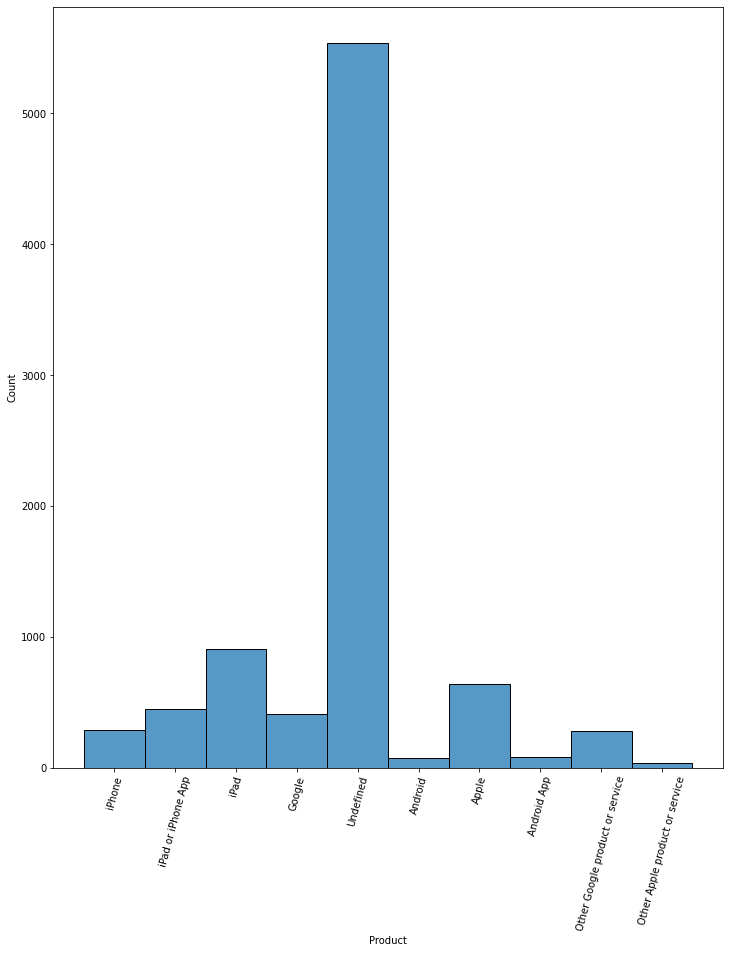

In [165]:
#Plot to check the distribution
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(data["Product"] )
plt.xticks(rotation = 75)
plt.show()

Although the imbalance between the unidentified products may make it difficult to analyze product sentiment, we can still use this column to identify the brand that the tweets are primarily focused on.

In [166]:
#we are going to set the Product type as a string for our function below.
data["Product"].astype(str)

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
8692             Undefined
8693                  iPad
8694             Undefined
8695             Undefined
8696             Undefined
Name: Product, Length: 8697, dtype: object

A brand's sentiment is being measured by the model. As a result, we need to examine how the dataset is divided up among the various companies. Two of the biggest tech brands in the world are represented by the two brands in this data set. Google and Apple. To assign each tweet to a brand, we will therefore create a new column.

In [167]:
# Function that finds a brand
def find_brand(Product, Tweet):
    """
    This function is designed to take build a brand column based on the Product description. 
    After, the function will look at the Tweets and determine a brand for rows with no brand determined.
    
    Product -  a column the function is working on
    Tweet - a column the function is working on
    """
    brand = 'Undetermined' #Labeling brand as Undetermined
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): #Labeling Google
        brand = 'Google' #Unless tweet contains google or android
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): #Labeling Apple
        brand = 'Apple' #Unless tweet contains apple or ip
    
    if (brand == 'Undetermined'): 
        lower_tweet = Tweet.lower() #Making tweet lowercase
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) #Undetermined google
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) #Undetermined apple
        
        if (is_google and is_apple): #if it has both identifiers in the tweet
            brand = 'Both' #Labeling brand as both
        elif (is_google):
            brand = 'Google' #Labeling brand as Google
        elif (is_apple):
            brand = 'Apple' #Labeling brand as Apple
    
    return brand

data['Brand'] = data.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) #Applying function to column
data['Brand'].value_counts() #Reviewing value counts of each class within brand


Apple           5140
Google          2637
Undetermined     715
Both             205
Name: Brand, dtype: int64

We can now analyze sentiment across brands without losing data thanks to the creation of a brand column. To help our models be trained on real-world scenarios, we continue to use the Undertermined and Both Brands.

## 6. Exploratory Analysis

Ploting the bivariate summaries and recording our observations

In [168]:
# This function builds a Seaborn countplot and allows the user to set certain parameters to customize the graph.
def countplot(df, col, hue=None, rotation=None):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()


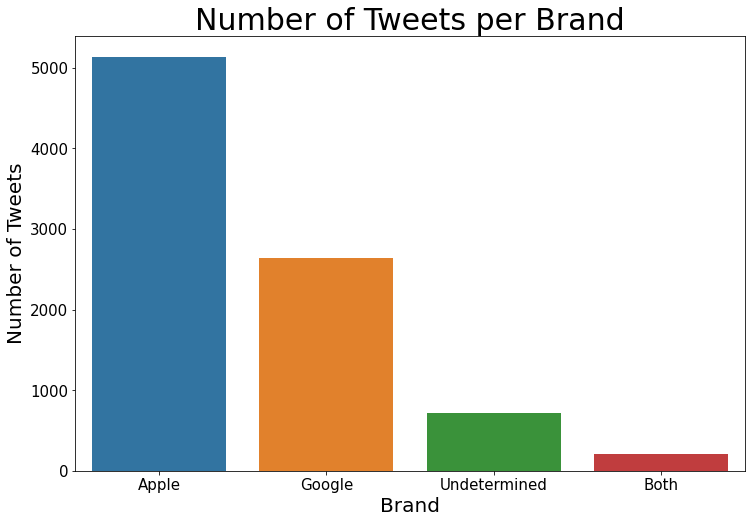

In [169]:
#countplot for Brand
countplot(data, "Brand")

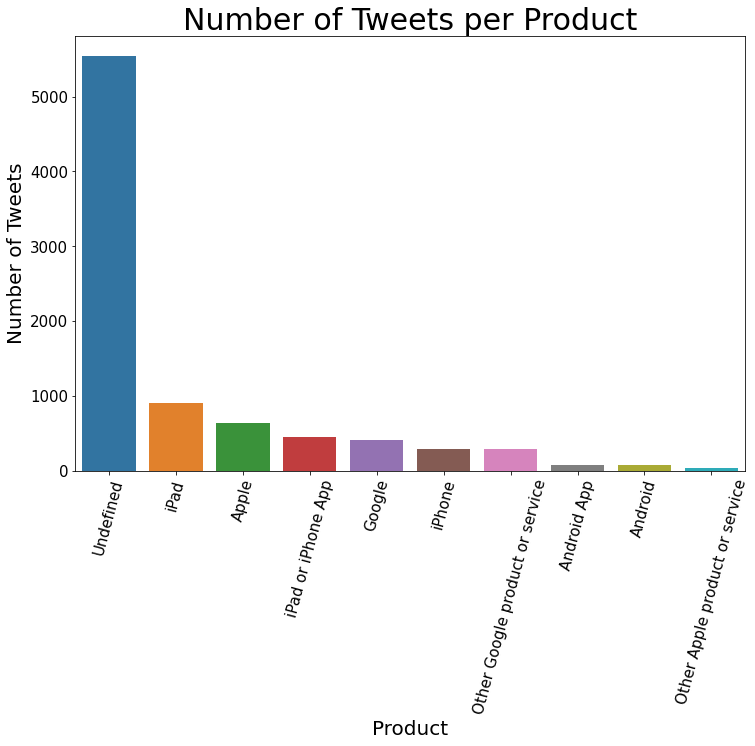

In [170]:
#countplot for Product
countplot(data, "Product", hue=None, rotation=75)

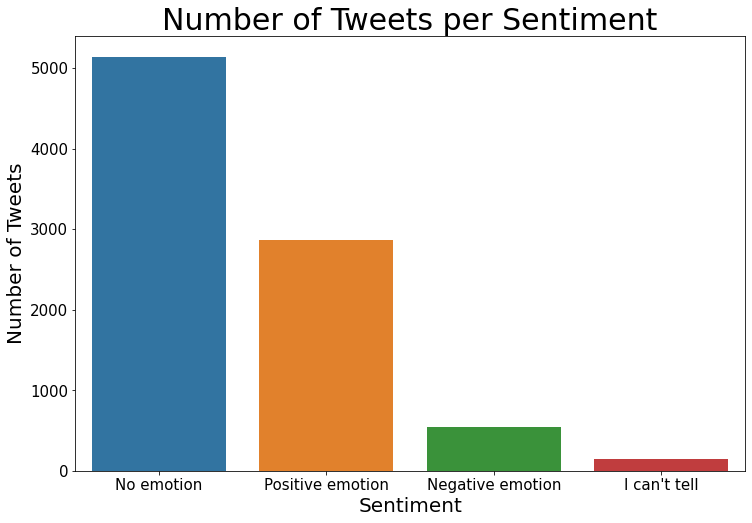

In [171]:
# Count plot for sentiment
countplot(data, "Sentiment")

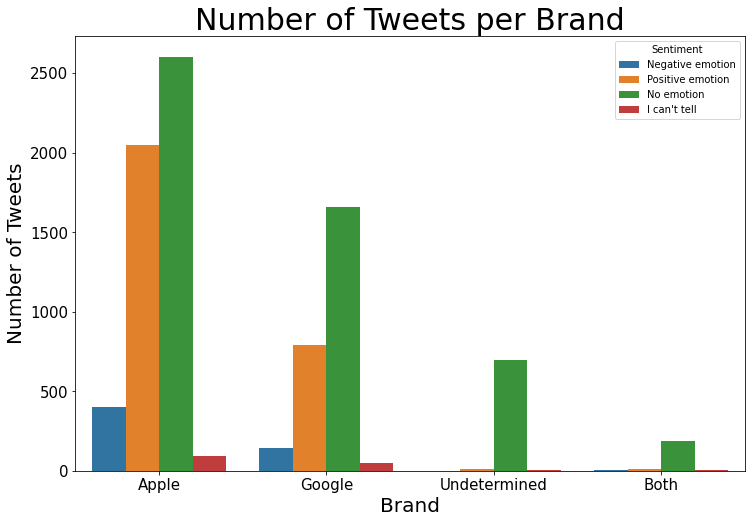

In [172]:
#count plot for Sentiment across brands
countplot(data, "Brand", hue = "Sentiment")

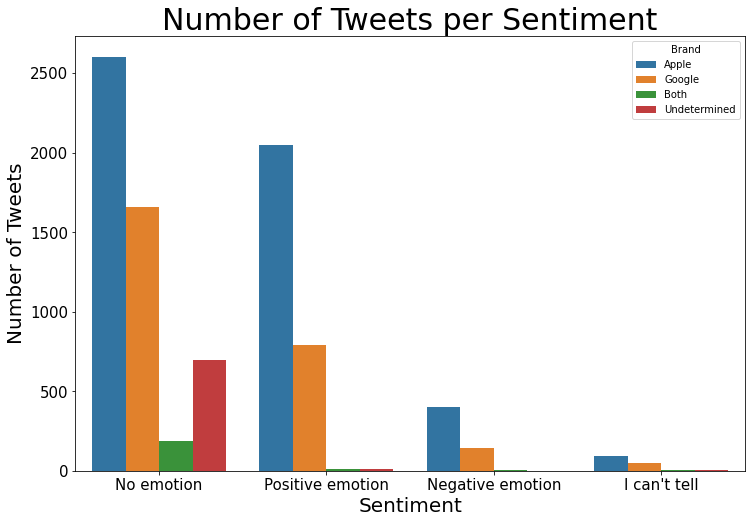

In [173]:
#countplot for brand make of sentiment
countplot(data, "Sentiment", hue="Brand")

In [174]:
#looking at the number of tweets per brand per sentiment
grouped = data.groupby(["Brand", "Sentiment"]).count()
grouped

Tweet  Product
Brand        Sentiment                       
Apple        I can't tell         90       90
             Negative emotion    398      398
             No emotion         2604     2604
             Positive emotion   2048     2048
Both         I can't tell          7        7
             Negative emotion      3        3
             No emotion          185      185
             Positive emotion     10       10
Google       I can't tell         49       49
             Negative emotion    142      142
             No emotion         1656     1656
             Positive emotion    790      790
Undetermined I can't tell          5        5
             Negative emotion      1        1
             No emotion          696      696
             Positive emotion     13       13

In [175]:
#looking at sentitmental breakdown of brands
display(data.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))
print("-"*60)
display(data.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))

Sentiment         Brand       
I can't tell      Apple           0.596026
                  Google          0.324503
                  Both            0.046358
                  Undetermined    0.033113
Negative emotion  Apple           0.731618
                  Google          0.261029
                  Both            0.005515
                  Undetermined    0.001838
No emotion        Apple           0.506516
                  Google          0.322116
                  Undetermined    0.135382
                  Both            0.035985
Positive emotion  Apple           0.715834
                  Google          0.276127
                  Undetermined    0.004544
                  Both            0.003495
Name: Brand, dtype: float64

------------------------------------------------------------


Brand         Sentiment       
Apple         No emotion          0.506615
              Positive emotion    0.398444
              Negative emotion    0.077432
              I can't tell        0.017510
Both          No emotion          0.902439
              Positive emotion    0.048780
              I can't tell        0.034146
              Negative emotion    0.014634
Google        No emotion          0.627986
              Positive emotion    0.299583
              Negative emotion    0.053849
              I can't tell        0.018582
Undetermined  No emotion          0.973427
              Positive emotion    0.018182
              I can't tell        0.006993
              Negative emotion    0.001399
Name: Sentiment, dtype: float64

In [176]:
#Number of Tweets per product
print(data["Product"].value_counts())
print("-"*60)
#Number of Tweets per Sentiment
print(data["Sentiment"].value_counts())
print("-"*60)
#Number of Tweet per Brand
print(data["Brand"].value_counts())
print("-"*60)

Undefined                          5537
iPad                                909
Apple                               638
iPad or iPhone App                  450
Google                              410
iPhone                              287
Other Google product or service     282
Android App                          77
Android                              73
Other Apple product or service       34
Name: Product, dtype: int64
------------------------------------------------------------
No emotion          5141
Positive emotion    2861
Negative emotion     544
I can't tell         151
Name: Sentiment, dtype: int64
------------------------------------------------------------
Apple           5140
Google          2637
Undetermined     715
Both             205
Name: Brand, dtype: int64
------------------------------------------------------------


In [177]:
#Final DataFrame before Preprocessing
data

,Tweet,Product,Sentiment,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion,Google
...,...,...,...,...
8692,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",Undefined,No emotion,Google
8693,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
8694,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Undefined,No emotion,Google
8695,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Undefined,No emotion,Google


## DATA PREPROCESSING AND FEATURE ENGINEERING

In this phase of the project, we will get to preprocess our data and prepare the text data for modeling by performing the tasks below.

use regular expression to remove:
- twitter handle
- links
- hash tags
- RT
- punctuations

remove
- stopwords
- lowercase
- numbers

tokenization

lemmatization

vectorization
- count

visualization
- frequency distribution(FreqDist)
- Word Cloud

First we will start by using regular expression in cleaning the text data stored in 'tweets' column by removing punctuations, links, retweets etc.

In [178]:
# Use regular expression to clean out the hash tags, links and punctuations from our tweet

def strip_links(text):
    """
    Remove links from our text
    """
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

    

def strip_all_entities(text):
    """
    Remove user handles, hashtags and punctuations from our text
    """
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

we will use the our two functions together  with the map() function to remove the links, tags and user handles from the tweets

In [179]:
# map the functions onto the data set
data['Tweet'] = data.Tweet.map(lambda x: strip_all_entities(strip_links(x)))

In [180]:
# load the data set
data.Tweet

0                                        I have a 3G iPhone After 3 hrs tweeting at Austin it was dead I need to upgrade Plugin stations at
1                            Know about Awesome iPad iPhone app that you ll likely appreciate for its design Also they re giving free Ts at
2                                                                                     Can not wait for 2 also They should sale them down at
3                                                                     I hope this year s festival isn t as crashy as this year s iPhone app
4                                  great stuff on Fri Marissa Mayer Google Tim O Reilly tech books conferences amp Matt Mullenweg Wordpress
                                                                       ...                                                                 
8692                                                                 Yup but I don t have a third app yet I m on Android any suggestions CC
8693                

Our function has been able to remove the handle, links and hashtags, but from row 8694, we can still see retweets present in our data, represented by the word RT. Because this is a major feature on twitter, it is bound to appear a lot, and thus should be removed as well.

Below, we will write a regular xpression to get rid of the RT from our data as well as the term ' link' that were used as placeholders for the links url 

In [181]:
data['Tweet'] = data.Tweet.map(lambda x: re.sub('RT', " ", x)) # Remove RT (retweet)
data['Tweet'] = data.Tweet.map(lambda x: re.sub('link', " ", x)) # Remove link
data.Tweet

0                                        I have a 3G iPhone After 3 hrs tweeting at Austin it was dead I need to upgrade Plugin stations at
1                            Know about Awesome iPad iPhone app that you ll likely appreciate for its design Also they re giving free Ts at
2                                                                                     Can not wait for 2 also They should sale them down at
3                                                                     I hope this year s festival isn t as crashy as this year s iPhone app
4                                  great stuff on Fri Marissa Mayer Google Tim O Reilly tech books conferences amp Matt Mullenweg Wordpress
                                                                       ...                                                                 
8692                                                                 Yup but I don t have a third app yet I m on Android any suggestions CC
8693                

Now that we have that done and dusted. Let's remove the stopwords from our data set, ensure the words are in lower case, and then tokenize our dataset.

In [182]:
# create a word tokenize
def tokenize_data(text):
    """
    A function responsible for tokenizing our sentences
    """
    # tokenize the data
    tokens = word_tokenize(text)

    # create our stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list += [str(x) for x in range(10)]

    # convert everything to lowercase
    clean_list = [word.lower() for word in tokens if word.lower() not in stopwords_list]

    return clean_list

In [183]:
data['Tweet'] = data.Tweet.map(lambda x: tokenize_data(x))
data.Tweet

0                                                      [3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]
1                                          [know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]
2                                                                                                              [wait, also, sale]
3                                                                               [hope, year, festival, crashy, year, iphone, app]
4             [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
8692                                                                             [yup, third, app, yet, android, suggestions, cc]
8693                                                                                      

Below, i will load the dataset after cleaning and tokenizing.

In [184]:
# load the cleaned data
data

,Tweet,Product,Sentiment,Brand
0,"[3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]",iPhone,Negative emotion,Apple
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]",iPad or iPhone App,Positive emotion,Apple
2,"[wait, also, sale]",iPad,Positive emotion,Apple
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,Apple
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]",Google,Positive emotion,Google
...,...,...,...,...
8692,"[yup, third, app, yet, android, suggestions, cc]",Undefined,No emotion,Google
8693,"[ipad, everywhere]",iPad,Positive emotion,Apple
8694,"[wave, buzz, interrupt, regularly, scheduled, geek, programming, big, news]",Undefined,No emotion,Google
8695,"[google, zeiger, physician, never, reported, potential, ae, yet, fda, relies, physicians, quot, operating, w, data, quot]",Undefined,No emotion,Google


After cleaning and tokenizing our data, the next step in our text preparation will be lemmatization. Lemmatization helps in transforming the text data by removing the suffixes of our data. Since lemmatizing uses part-of-speech tagging to determine how to transform a word, we'll need to incoperate word net in the lammetization.

Based on this below, i will create a function that converts the nltk parts-of-speech to wordnet tags. basically inputs the nltk pos tags and outputs the wordnet lemmatizer tags that can be interpretted by out lemmatizier

In [185]:
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [186]:
nltk.download('tagsets', quiet=True)

True

In [187]:
def wordnet_pos(word_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [188]:
u = data['Tweet'][0]
u

['3g',
 'iphone',
 'hrs',
 'tweeting',
 'austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations']

In [189]:
u = pos_tag(u)
u

[('3g', 'CD'),
 ('iphone', 'NN'),
 ('hrs', 'NN'),
 ('tweeting', 'VBG'),
 ('austin', 'NNS'),
 ('dead', 'JJ'),
 ('need', 'VBP'),
 ('upgrade', 'JJ'),
 ('plugin', 'NN'),
 ('stations', 'NNS')]

In [190]:
 # inastantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

In [191]:
X = data['Tweet']
X

0                                                      [3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]
1                                          [know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]
2                                                                                                              [wait, also, sale]
3                                                                               [hope, year, festival, crashy, year, iphone, app]
4             [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
8692                                                                             [yup, third, app, yet, android, suggestions, cc]
8693                                                                                      

In [192]:
def word_lemma(text):
    
    word_pos_tags = pos_tag(text)
    
    word_net_tag = [(text[0], wordnet_pos(text[1])) for text in word_pos_tags]
    
    lemma_word = [lemmatizer.lemmatize(text[0], text[1]) for text in word_net_tag]
    
    return lemma_word
    
    


In [193]:
data['Tweet'] = X.map(lambda x: word_lemma(x))


In [194]:
data['Tweet']

0                                                       [3g, iphone, hr, tweet, austin, dead, need, upgrade, plugin, station]
1                                         [know, awesome, ipad, iphone, app, likely, appreciate, design, also, give, free, t]
2                                                                                                          [wait, also, sale]
3                                                                           [hope, year, festival, crashy, year, iphone, app]
4           [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, amp, matt, mullenweg, wordpress]
                                                                ...                                                          
8692                                                                          [yup, third, app, yet, android, suggestion, cc]
8693                                                                                                       [ipad, ever

### Plot a Frequency Distribution 

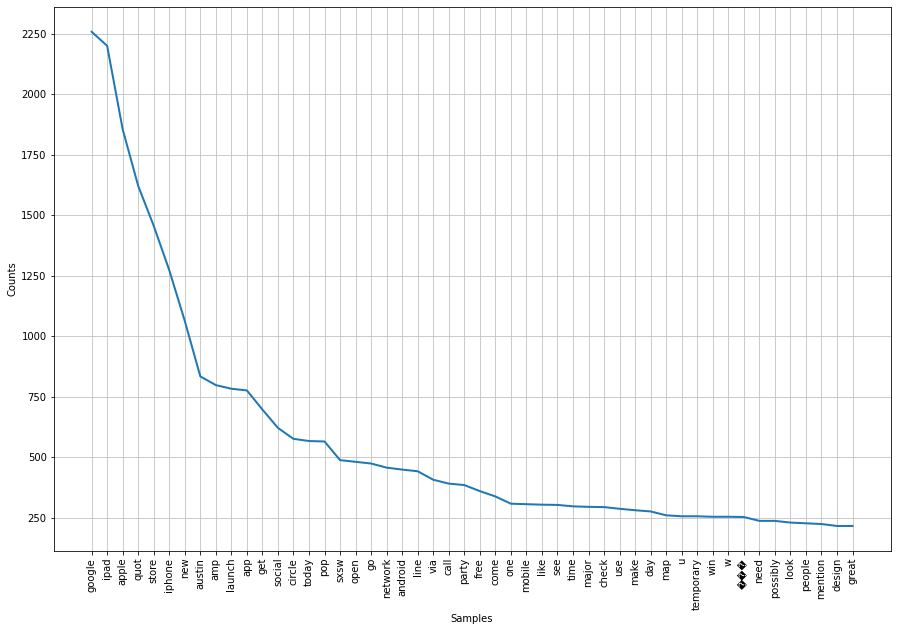

In [195]:
sample = data['Tweet']
freq1_dist = []

for tweet in sample:
    freq1_dist.extend(tweet)
    
fdist = FreqDist(freq1_dist)
plt.figure(figsize=(15, 10))
fdist.plot(50);

In [199]:
fdist.most_common(200)

[('google', 2258),
 ('ipad', 2200),
 ('apple', 1855),
 ('quot', 1621),
 ('store', 1456),
 ('iphone', 1273),
 ('new', 1063),
 ('austin', 834),
 ('amp', 798),
 ('launch', 783),
 ('app', 776),
 ('get', 697),
 ('social', 621),
 ('circle', 576),
 ('today', 567),
 ('pop', 565),
 ('sxsw', 488),
 ('open', 481),
 ('go', 474),
 ('network', 457),
 ('android', 449),
 ('line', 442),
 ('via', 407),
 ('call', 391),
 ('party', 385),
 ('free', 360),
 ('come', 338),
 ('one', 308),
 ('mobile', 306),
 ('like', 304),
 ('see', 303),
 ('time', 297),
 ('major', 295),
 ('check', 294),
 ('use', 287),
 ('make', 281),
 ('day', 276),
 ('map', 260),
 ('u', 256),
 ('temporary', 256),
 ('win', 254),
 ('w', 254),
 ('���', 253),
 ('need', 237),
 ('possibly', 237),
 ('look', 230),
 ('people', 227),
 ('mention', 224),
 ('design', 216),
 ('great', 216),
 ('downtown', 216),
 ('say', 211),
 ('know', 210),
 ('mayer', 206),
 ('think', 203),
 ('@', 203),
 ('apps', 200),
 ('popup', 197),
 ('good', 187),
 ('talk', 186),
 ('take'

In [132]:
# The preprocessed data set
data

,Tweet,Product,Sentiment,Brand
0,"[3g, iphone, hr, tweet, austin, dead, need, upgrade, plugin, station]",iPhone,Negative emotion,Apple
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, give, free, t]",iPad or iPhone App,Positive emotion,Apple
2,"[wait, also, sale]",iPad,Positive emotion,Apple
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,Apple
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, amp, matt, mullenweg, wordpress]",Google,Positive emotion,Google
...,...,...,...,...
8692,"[yup, third, app, yet, android, suggestion, cc]",Undefined,No emotion,Google
8693,"[ipad, everywhere]",iPad,Positive emotion,Apple
8694,"[wave, buzz, interrupt, regularly, schedule, geek, program, big, news]",Undefined,No emotion,Google
8695,"[google, zeiger, physician, never, report, potential, ae, yet, fda, relies, physicians, quot, operate, w, data, quot]",Undefined,No emotion,Google


In [133]:
data['Tweet'] = data.Tweet.map(lambda x: ' '.join(map(str, x)))
data

,Tweet,Product,Sentiment,Brand
0,3g iphone hr tweet austin dead need upgrade plugin station,iPhone,Negative emotion,Apple
1,know awesome ipad iphone app likely appreciate design also give free t,iPad or iPhone App,Positive emotion,Apple
2,wait also sale,iPad,Positive emotion,Apple
3,hope year festival crashy year iphone app,iPad or iPhone App,Negative emotion,Apple
4,great stuff fri marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress,Google,Positive emotion,Google
...,...,...,...,...
8692,yup third app yet android suggestion cc,Undefined,No emotion,Google
8693,ipad everywhere,iPad,Positive emotion,Apple
8694,wave buzz interrupt regularly schedule geek program big news,Undefined,No emotion,Google
8695,google zeiger physician never report potential ae yet fda relies physicians quot operate w data quot,Undefined,No emotion,Google


## Modeling

The step of the project will include the following steps:
1. Specifying our X and y.
2. Spliting our data into training and testing data
3. Vectorizing our data using TF-IDF vectorizer
4. Choosing a baseline model
5. Tuning the selected baseline model

In [134]:
#Specifying X and y
X = data['Tweet']
y = data['Sentiment']

In [135]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
#Instantiate the TfidfVectorizer
vectorizer = TfidfVectorizer()

#Fitting and transforming the training data
X_train_vec = vectorizer.fit_transform(X_train).toarray()

#Fitting on test data
X_test_vec = vectorizer.transform(X_test).toarray()

In [137]:
#Checking dimensions of vectorized data
X_train_vec.shape, X_test_vec.shape


((6957, 6376), (1740, 6376))

In [138]:
from sklearn.naive_bayes import MultinomialNB
#Instantiate Multinomial
model_NB = MultinomialNB()
model_NB.fit(X_train_vec, y_train)

MultinomialNB()

In [139]:
def get_prediction(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Training Prediction')
    print('--------------------')
    print(classification_report(y_train, y_train_pred))
    print('Test Prediction')
    print('--------------------')
    print(classification_report(y_test, y_test_pred))
    
    return y_train_pred, y_test_pred

In [140]:
_, _ = get_prediction(model_NB, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       1.00      0.04      0.08       415
      No emotion       0.71      0.98      0.82      4139
Positive emotion       0.88      0.46      0.60      2283

        accuracy                           0.74      6957
       macro avg       0.65      0.37      0.38      6957
    weighted avg       0.77      0.74      0.69      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.50      0.01      0.02       129
      No emotion       0.63      0.95      0.75      1002
Positive emotion       0.69      0.26      0.38       578

        accuracy                           0.63      1740
       macro avg       0.45      0.30      0.29      1740
    weighted avg       0.63      0.63      0.56

In [141]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate a Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=0)

In [142]:
_, _ = get_prediction(model_rf, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.95      0.87      0.91       120
Negative emotion       0.98      0.92      0.95       415
      No emotion       0.95      0.98      0.97      4139
Positive emotion       0.96      0.93      0.95      2283

        accuracy                           0.96      6957
       macro avg       0.96      0.92      0.94      6957
    weighted avg       0.96      0.96      0.96      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.76      0.15      0.25       129
      No emotion       0.67      0.85      0.75      1002
Positive emotion       0.61      0.46      0.52       578

        accuracy                           0.65      1740
       macro avg       0.51      0.36      0.38      1740
    weighted avg       0.65      0.65      0.62

In [143]:
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression()
model_lr.fit(X_train_vec, y_train)

LogisticRegression()

In [144]:
_, _ = get_prediction(model_lr, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       0.91      0.16      0.27       415
      No emotion       0.77      0.95      0.85      4139
Positive emotion       0.83      0.64      0.73      2283

        accuracy                           0.78      6957
       macro avg       0.63      0.44      0.46      6957
    weighted avg       0.78      0.78      0.76      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.69      0.07      0.13       129
      No emotion       0.68      0.87      0.76      1002
Positive emotion       0.62      0.47      0.54       578

        accuracy                           0.66      1740
       macro avg       0.50      0.35      0.36      1740
    weighted avg       0.65      0.66      0.63

## Hyperparameters tuning

In [202]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['saga'],
     'random_state':[0]
    }
]

In [203]:
lr = GridSearchCV(model_lr, param_grid = param_grid, cv = 3)

In [204]:
lr_grid = lr.fit(X_train_vec, y_train)

In [205]:
_, _ = get_prediction(lr_grid, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       0.91      0.16      0.27       415
      No emotion       0.77      0.95      0.85      4139
Positive emotion       0.83      0.64      0.72      2283

        accuracy                           0.78      6957
       macro avg       0.63      0.44      0.46      6957
    weighted avg       0.78      0.78      0.76      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.69      0.07      0.13       129
      No emotion       0.68      0.87      0.76      1002
Positive emotion       0.62      0.47      0.54       578

        accuracy                           0.66      1740
       macro avg       0.50      0.35      0.36      1740
    weighted avg       0.65      0.66      0.63